# $$\color{red}{\text{Artificial Intelligence - Camputer Assignment 0}}$$

$$\color{lime}{\text{Alireza Javid - 810099011}}$$

## $\color{deepskyblue}{\text{Introduction}}$
In this assignment, we get acquainted with Jupyter Notebook and some primary features and libraries in Python. Learning these can help us better perceive data and use them correctly all over Artificial Intelligence and Machine Learning. We use the *train.csv* dataset, which includes the train passenger's details and whether they survived or not. After visualizing the dataset and analyzing it, we create a basic classification model and test our model with the *test.csv* dataset. 

## $\color{deepskyblue}{\text{Import Libraries}}$


In [297]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm

## $\color{deepskyblue}{\text{Question 1: Analyzing Dataset}}$
We read *train.csv* using pandas library, then examine its data using pandas methods.
As we can see below, *"head"* method shows us the first five rows of the dataset by default. We can ask to show us more or less than five rows by calling our desired number to this method. We can see here our dataset has twelve columns for different attributes. These attributes are mentioned in CA description.

In [294]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


With *"describe"* method, we can see brief statistical properties of numeric columns and shape of a dataset’s distribution, excluding NaN values. The last five rows indicate the five-number summary of the Corresponding box plot. In *"train"* dataset as we can see here, we leak information about Age columns.   

In [258]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The *"info"* method prints a concise summary of a DataFrame. This information includes the index dtype and columns, non-null values, and memory usage. It comes really handy when doing exploratory analysis of the data and get a quick overview of the dataset.

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The *"tail"* method is similar to *"head"* method expect it shows the five last rows of the dataset.

In [260]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## $\color{deepskyblue}{\text{Question 2: Labeling Dataset}}$
We label *"male"* Sex to 1 and *"female"* to 0. With this approuch we convert a categorical column to numerical column.

In [261]:
df.loc[(df['Sex'] == "male"), 'Sex'] = 1
df.loc[(df['Sex'] == "female"), 'Sex'] = 0

## $\color{deepskyblue}{\text{Question 3: NaN Values}}$
First we use *isna* and *sum* method to count number of missing values at each column. We can see that more than half the rows of Cabin column are nan so this column can be dropped. Age column is a numeric column, and we can use column mean's to fill nan values. For filling Embarked column we can use column mode.

In [262]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [263]:
df.dropna(thresh=len(df) / 2, axis=1,inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [264]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### $\color{deepskyblue}{\text{Advantages and Disadvantages of Using Mean for Missing Values}}$
 
$\color{lime}{\text{Advantages :}}$

> Mean imputation is very simple to understand and to apply.

> We can keep our whole dataset.

>The sample mean of your variable is not biased.

$\color{red}{\text{Disadvantages :}}$

> The problem isn’t specifically that it reduces the variance, but that it changes the variance of the dataset, making it a *less accurate* estimate for the variance of the actual population. More generally, it will make the dataset a less accurate reflection of the population, in many ways.

> Mean and mode ignore feature correlations and might have a negative effect on accuracy when training our ML model.

> Can't be used in categorical features.

## $\color{deepskyblue}{\text{Question 4: Remove Unuseable Columns }}$

As we can see, every passenger has a unique "PassaengerId" and "Name." These columns don't help us in further analysis, and we can remove them.

In [265]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [266]:
df.drop(columns=["PassengerId", "Name"], inplace=True)

## $\color{deepskyblue}{\text{Question 5: People Distribution }}$
In the first part, we demonstrate the train population of men and women.

In [267]:
df["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Now we examine how many men embarked in Southampton.

In [268]:
df[(df["Embarked"] == "S") & (df["Sex"] == 1)].shape[0]

441

## $\color{deepskyblue}{\text{Question 6}}$
Using vectorization, 41 passengers over 35 years have no company with them and have type 3 tickets. 


In [295]:
df[(df["SibSp"] == 0) & (df["Parch"] == 0) & (df["Age"] > 35) & (df["Pclass"] == 3)].shape[0]

41

## $\color{deepskyblue}{\text{Question 7}}$
We can notice the mean price ticket for Queenstown passengers is about 13.28.

In [301]:
t = time.time()
print(df[df.Embarked == "Q"]["Fare"].mean(), "mean price ticket for Queenstown")
print("--- %s seconds ---" % (time.time() - t))

13.276029870129872 mean price ticket for Queenstown
--- 0.002037525177001953 seconds ---


## $\color{deepskyblue}{\text{Question 8}}$
Now we use *for loop* to calculate mean price ticket for Queenstown

In [303]:
t = time.time()
sum = 0
num = 0
for i, x in df.iterrows():
    if x["Embarked"] == "Q":
        sum += x["Fare"]
        num += 1
print(sum / num, "mean price ticket for Queenstown")
print("--- %s seconds ---" % (time.time() - t))

13.276029870129872 mean price ticket for Queenstown
--- 0.031915903091430664 seconds ---


We can see vectorization is more efficient and more than ten times faster than looping.

## $\color{deepskyblue}{\text{Question 9: Histogram Plot}}$
In this part, we visualize the dataset's attributes with histogram plots. Visualizing helps us better understand data distributions in every dataset's attribute.

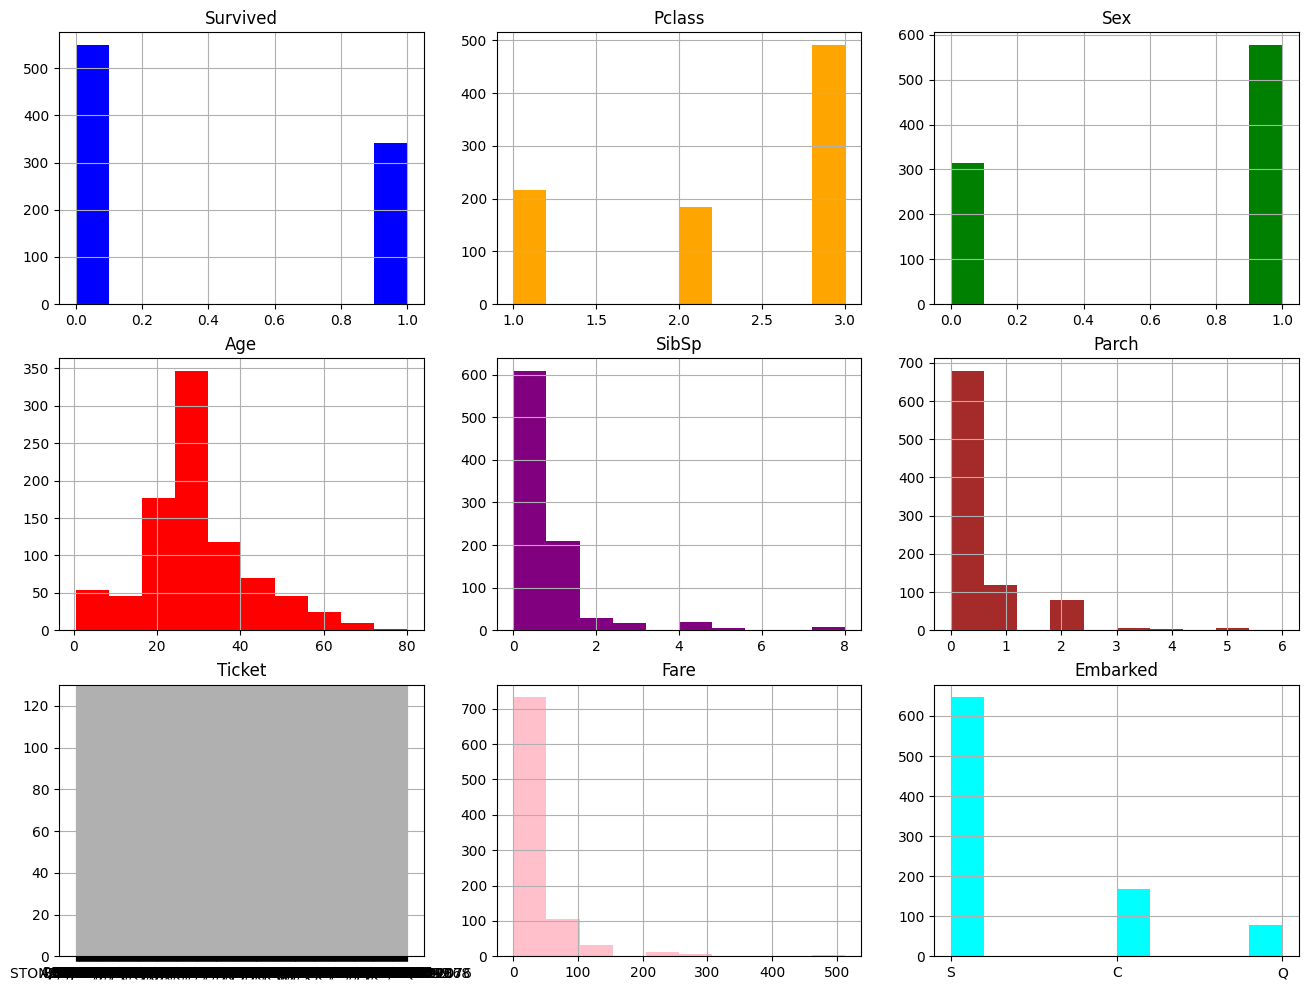

In [272]:
fig, axes = plt.subplots(3, 3, figsize=(16,12))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','gray' , 'pink', 'cyan']

cols = df.columns
for i in range(3):
    for j in range(3):
        df[cols[i*3 + j]].hist(ax=axes[i][j], color = colors[i*3 + j])
        axes[i][j].set_title(cols[i*3 + j])
        axes[i][j].set_ylabel("Frequency")


## $\color{deepskyblue}{\text{Question 10: Normalize Data}}$ 
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model. In this part we use Z-score normalization. Z-score is a variation of scaling that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping.
$$
Z = \frac{x - \mu}{\sigma}
$$

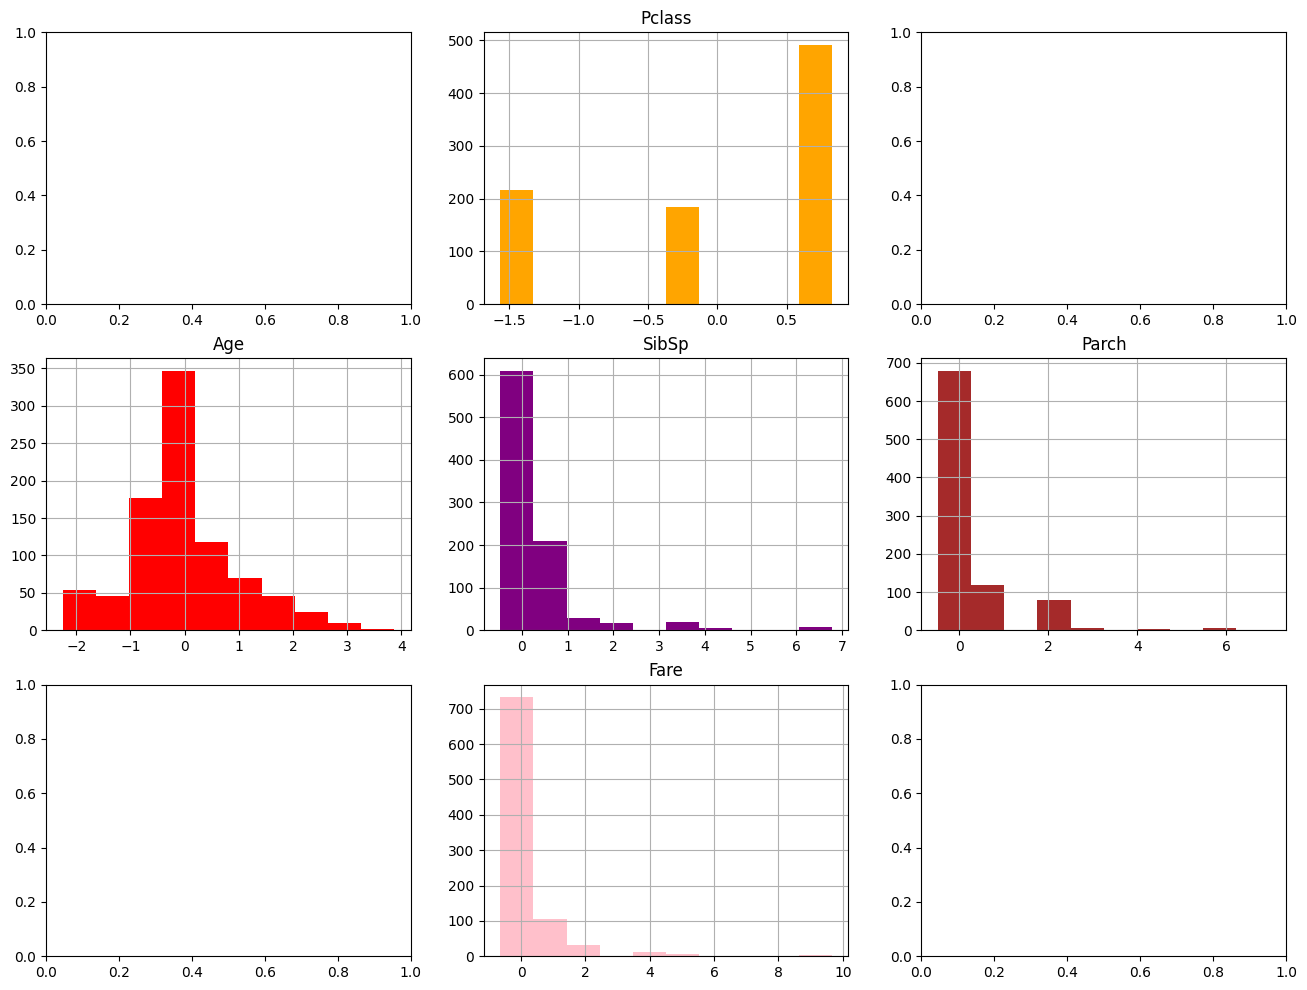

In [273]:
fig, axess = plt.subplots(3, 3, figsize=(16,12))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','gray' , 'pink', 'cyan']
cols = df.columns
for i in range(3):
    for j in range(3):
        if df[cols[i*3 + j]].dtype == 'object' or cols[i*3 + j] == "Survived":
            continue
        df[cols[i*3 + j]] = (df[cols[i*3 + j]] - df[cols[i*3 + j]].mean()) / df[cols[i*3 + j]].std()
        df[cols[i*3 + j]].hist(ax=axess[i][j], color = colors[i*3 + j])
        axess[i][j].set_title(cols[i*3 + j])
        axes[i][j].set_ylabel("Frequency")

## $\color{deepskyblue}{\text{Question 11: Select Best Attribute for Classification}}$
Now we sketch the pdf plot for every feature. We use a normal distribution with corresponding mean and variance. *scipy.stats()* function of the helps us for sketch Probability Density (PDF) function for every feature. We look for the feature that has a significant difference between survived and not survived people. After that, we can use this feature for our classification model.




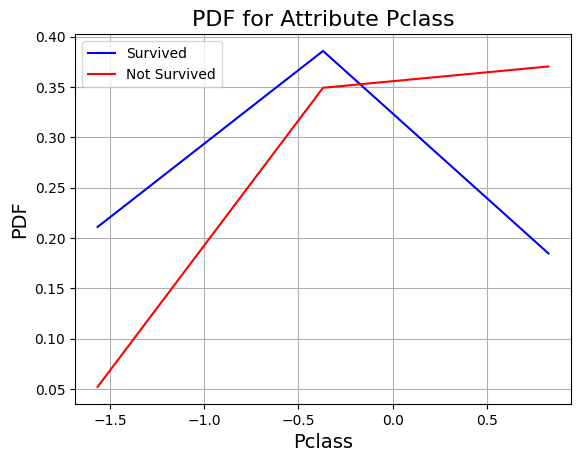

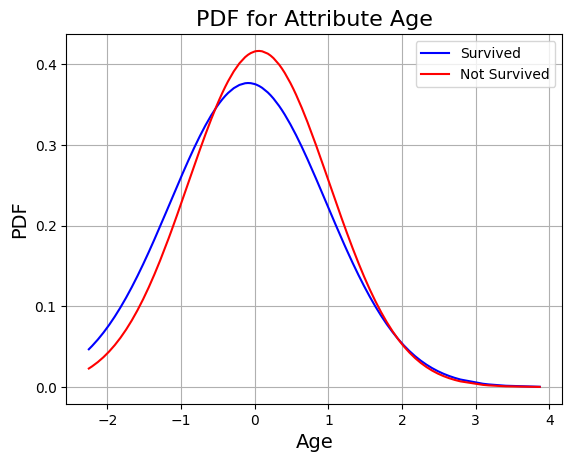

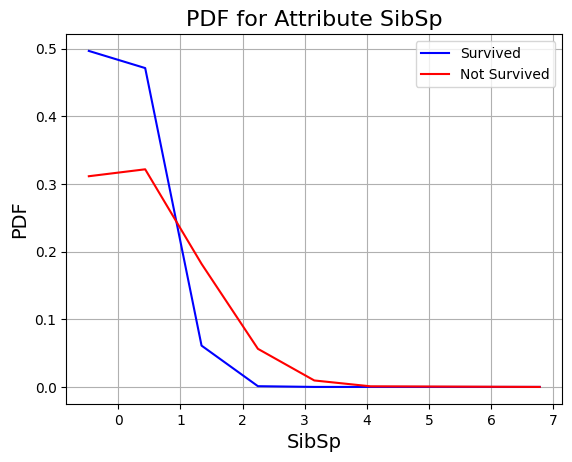

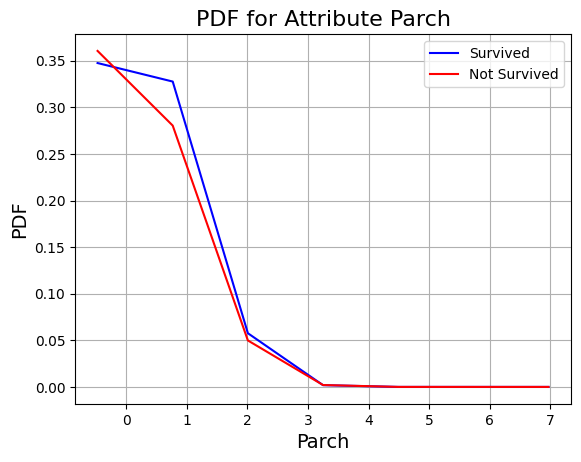

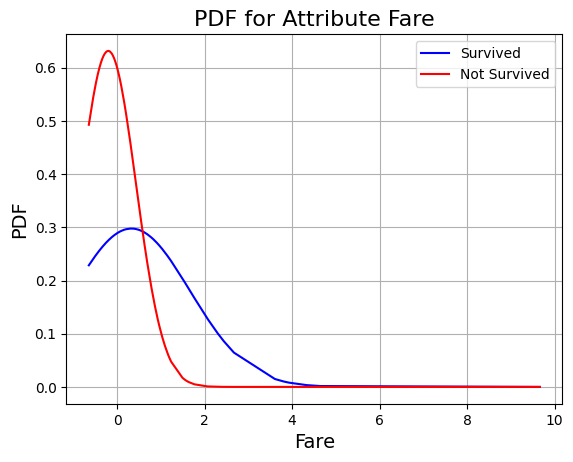

In [284]:
for col in df:
    if df[col].dtype == 'object' or col == "Survived":
        continue
    fig, ax = plt.subplots()
    survived = df[df.Survived == 1]
    mean_s = survived[col].mean()
    std_s = survived[col].std()
    pdf_s = norm.pdf(df[col].sort_values(), mean_s, std_s)

    not_survived = df[df.Survived == 0]
    mean_ns = not_survived[col].mean()
    std_ns = not_survived[col].std()
    pdf_ns = norm.pdf(df[col].sort_values(), mean_ns, std_ns)

    ax.plot(df[col].sort_values(), pdf_s, 'b', label="Survived")
    ax.plot(df[col].sort_values(), pdf_ns, 'r', label="Not Survived")
    ax.legend()
    ax.set_ylabel('PDF', fontsize = 14)
    ax.set_xlabel(col, fontsize = 14)
    ax.set_title('PDF for Attribute ' + col, fontsize = 16)
    ax.grid(True, which = 'both')

We choose the `Fare` feature as the model input because according to the corresponding diagram, this feature can better distinguish between *Survived* and *Not Survived* people.

## $\color{deepskyblue}{\text{Question 12: Testing Classification Model}}$
Assume both *Survived* and *Not Survived* people have a normal distribution  for the *fare*. We find a Threshold to decide whether people can survive or not. 

$$
\frac{1}{\sqrt{2 \pi } {\sigma}_1} e^{\frac{-(x - {\mu}_1)^2}{2 {\sigma}_1^2}} = \frac{1}{\sqrt{2 \pi } {\sigma}_2} e^{\frac{-(x - {\mu}_2)^2}{2 {\sigma}_2^2}}
$$
$$
\frac{{\sigma}_2}{{\sigma}_1} = e^{\frac{-(x - {\mu}_2)^2}{2 {\sigma}_2^2} + \frac{(x - {\mu}_1)^2}{2 {\sigma}_1^2}}
$$
$$
ln(\frac{{\sigma}_2}{{\sigma}_1}) = \frac{-(x - {\mu}_2)^2}{2 {\sigma}_2^2} + \frac{(x - {\mu}_1)^2}{2 {\sigma}_1^2}
$$
$$
\{\frac{-1}{{\sigma}_2^2} + \frac{1}{{\sigma}_1^2}\} x^2 + \{\frac{2{\mu}_2}{{\sigma}_2} - \frac{2{\mu}_1}{{\sigma}_1}\} x + \frac{{\mu}_1^2}{{\sigma}_1^2} - \frac{{\mu}_2^2}{{\sigma}_2^2} - 2 \times ln(\frac{{\sigma}_2}{{\sigma}_1}) = 0
$$
After solving the equation, we see the fare threshold is about 0.71.

In [291]:
def get_collision_point(mean1, mean2, std1, std2):
    a_2 = -1/std2**2 + 1/std1**2
    a_1 = 2*mean2/std2**2 + 2*mean1/std1**2
    a_0 = -mean2**2/std2**2 + mean1**2/std1**2 - 2*np.log(std2/std1)
    return np.roots([a_2, a_1, a_0])

collision_points = get_collision_point(df[df.Survived == 1]["Fare"].mean(), df[df.Survived == 0]["Fare"].mean(),
     df[df.Survived == 1]["Fare"].std(), df[df.Survived == 0]["Fare"].std())
collision_points

array([-1.04946338,  0.71368798])

Now we can use our model in the *test.csv* dataset and determine the survival attribute.

In [293]:
def set_survivation(x, fare_threshold):
    if x["Fare"] <= fare_threshold:
        return 0 
    else:
        return 1

df_test = pd.read_csv("test.csv")
df_test["Fare"] = (df_test["Fare"] - df_test["Fare"].mean()) / df_test["Fare"].std()
df_test["Survived"] = df_test.apply(lambda x: set_survivation(x, collision_points[1]), axis=1)

#df_test.to_csv("prediction_result.csv")